In [56]:
import matplotlib.pyplot as plt
import numpy as np

In [57]:
# 设置matplotlib使用math text
plt.rcParams['axes.formatter.use_mathtext'] = True
# 如果需要更完整的数学字体设置，可以添加：
plt.rcParams['mathtext.fontset'] = 'cm'  # 使用Computer Modern字体
plt.rcParams['font.family'] = 'STIXGeneral'  # 使用STIX字体族

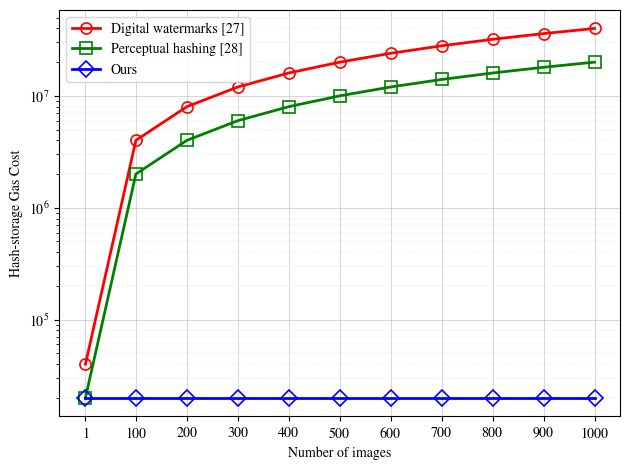

In [59]:
# 基准 gas（主网实测均值）
GAS_STORE  = 20_000        # sstore(root)

n_images = np.array([1] + list(range(100, 1001, 100)))
# CPDT感知哈希只存一个uint256的哈希，保持线性
cpdt_gas   = n_images * GAS_STORE
# JNCA数字水印只存两个uint256的哈希，保持线性
watermarks_gas   = n_images * (2 * GAS_STORE)
# NMFT：只 root 写一次 storage，事件 gas 可忽略
nmft_gas   = np.full_like(n_images, GAS_STORE, dtype=float)

# 在原有 plot 后面直接加 marker 参数即可
plt.semilogy(n_images, watermarks_gas, label='Digital watermarks [27]', color='r', lw=2,
             marker='o', markersize=8, markeredgewidth=1.2, markerfacecolor='none')
plt.semilogy(n_images, cpdt_gas, label='Perceptual hashing [28]', color='g', lw=2,
             marker='s', markersize=8, markeredgewidth=1.2, markerfacecolor='none')
plt.semilogy(n_images, nmft_gas, label='Ours', color='b', lw=2,
             marker='D', markersize=8, markeredgewidth=1.2, markerfacecolor='none')

# 主网格（10 的整数幂）
plt.grid(True, which='major', axis='both', linestyle='-', linewidth=0.4, alpha=0.9)

# 子网格（10^6 到 10^7 之间的 2-9 倍刻度线）
plt.grid(True, which='minor', axis='y', linestyle=':', linewidth=0.3, alpha=0.7)

# 确保 minor tick 在 log 下生效
ax = plt.gca()
ax.yaxis.set_minor_locator(plt.LogLocator(base=10, subs=np.arange(2, 10)))  # 2-9 子刻度
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))  # x 轴只显示整数刻度

plt.xlabel('Number of images')
plt.ylabel('Hash-storage Gas Cost')
plt.xticks(n_images)          # 让刻度恰好落在这些点
plt.xlim(-50, 1050)             # 留一点边距，防止 1 被截断
# plt.ylim((1,10**8))
plt.legend()
plt.tight_layout()
plt.savefig('./figs/hash-storage gas cost.png', dpi=300, bbox_inches='tight')
plt.show()